# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


## **Business Understanding**

**TELCO CUSTOMER CHURN PREDICTION**

**About Dataset**

Perusahaan telekomunikasi yang menyediakan layanan telepon rumah dan Internet kepada 7043 pelanggan di California pada Q3. Yang mengalami tingkat customer churn (pelanggan yang berhenti berlangganan atau masih berlangganan).

Dataset yang digunakan adalah:
- [Telco customer churn: IBM dataset](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset).

**Problem (Permasalahan Bisnis)**

Perusahaan telekomunikasi mengalami tingkat customer churn (pelanggan berhenti berlangganan) yang tinggi. Churn yang tidak terkendali dapat berdampak pada:
- Penurunan pendapatan bulanan dan tahunan.
- Biaya akuisisi pelanggan baru yang lebih mahal dibandingkan mempertahankan pelanggan lama.
- Berkurangnya loyalitas dan kepercayaan pelanggan terhadap layanan perusahaan.

**Purpose (Tujuan Proyek)**

Tujuan dari proyek ini adalah:
- Menganalisis karakteristik pelanggan yang memiliki kecenderungan untuk churn.
- Membangun model machine learning yang mampu memprediksi churn berdasarkan fitur-fitur pelanggan.
- Menyediakan sistem pemantauan (monitoring) dan pelaporan yang dapat membantu tim bisnis dan customer service mengambil tindakan preventif terhadap pelanggan berisiko tinggi.

**Goal (Sasaran Teknis)**
- Melakukan eksplorasi data (EDA) untuk memahami karakteristik pelanggan churn dan tidak churn.
- Melakukan preprocessing data agar siap digunakan oleh model machine learning.
- Membangun model klasifikasi (seperti Random Forest, Logistic Regression, XGBoost, dll) untuk memprediksi Churn Label.
- Melacak dan menyimpan artefak model menggunakan MLflow.
- Mengotomatisasi pipeline dengan MLproject & GitHub Actions.
- Memonitor performa sistem menggunakan Prometheus dan Grafana.
- Menyediakan dokumentasi lengkap untuk keperluan evaluasi dan pengembangan lanjutan.

**Value (Manfaat Bisnis)**
- Membantu perusahaan mengurangi churn rate dengan intervensi yang tepat waktu.
- Meningkatkan retensi pelanggan melalui analisis perilaku pelanggan.
- Mendukung keputusan tim marketing dan support melalui sistem prediksi dan monitoring.
- Menghemat biaya operasional karena dapat fokus pada pelanggan yang benar-benar berisiko tinggi.

**Data Description**

7043 observations with 33 variables

- CustomerID: A unique ID that identifies each customer.
- Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
- Country: The country of the customer’s primary residence.
- State: The state of the customer’s primary residence.
- City: The city of the customer’s primary residence.
- Zip Code: The zip code of the customer’s primary residence.
- Lat Long: The combined latitude and longitude of the customer’s primary residence.
- Latitude: The latitude of the customer’s primary residence.
- Longitude: The longitude of the customer’s primary residence.
- Gender: The customer’s gender: Male, Female
- Senior Citizen: Indicates if the customer is 65 or older: Yes, No
- Partner: Indicate if the customer has a partner: Yes, No
- Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
- Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
- Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
- Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
- Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
- Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
- Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
- Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
- CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
- Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
# Data and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

Tahap pertama yang dilakukan adalah melakukan import library yang bertujuan untuk mempersiapkan berbagai alat yang sesuai kebutuhan yang akan di analisis data. Sebelum itu, melakukan perintah !pip install ... digunakan untuk menginstal pustaka-pustaka Python yang dibutuhkan dalam proyek MLflow ini, seperti scikit-learn untuk pemrosesan data dan machine learning klasik. Sementara itu, pandas, matplotlib, dan seaborn digunakan untuk pemrosesan data dan visualisasi secara interaktif dan informatif.

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

## **Data Understanding**

Tahapan Data Understanding adalah tahapan awal yang dilakukan untuk Mengumpulkan dan mempersiapkan dataset yang akan digunakan sesuai dengan kebutuhan model. Sebelum memahami struktur dan isi dataset kita melakukan load dataset/data collection terlebih dahulu untuk mengumpulkan data dari berbagai sumber, seperti file CSV, database, API, atau web scraping. Tahapan ini terdiri dari :
- Mengimport library yang akan digunakan
- Menyiapkan data
- Memberikan informasi dataset
- Pengecekkan data
- Mendeskripsi data

- Membaca file csv ke dalam dataframe  df dan menampilkan 5 baris pertama

In [3]:
df = pd.read_excel("../Dataset/Telco_customer_churn.xlsx")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
# Menghapus beberapa kolom yang tidak perlu
kolom_yang_dihapus = ['CustomerID','Count',	'Country', 'State',	'Zip Code',	'Lat Long',	'Latitude',	'Longitude', 'Streaming Movies', 'Online Backup', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']
df_final = df.drop(columns=kolom_yang_dihapus)

# Konversi kolom 'Total Charges' menjadi float
df_final['Total Charges'] = pd.to_numeric(df_final['Total Charges'], errors='coerce')

# Menampilkan DataFrame baru
print("\nDataFrame Baru setelah menghapus kolom:")
print(df_final.head())

# Menyimpan DataFrame baru ke file CSV
df_final.to_csv('../Dataset/Fix-Telco_customer_churn.csv', index=False, encoding='utf-8', sep=',')


DataFrame Baru setelah menghapus kolom:
          City  Gender Senior Citizen Partner Dependents  Tenure Months  \
0  Los Angeles    Male             No      No         No              2   
1  Los Angeles  Female             No      No        Yes              2   
2  Los Angeles  Female             No      No        Yes              8   
3  Los Angeles  Female             No     Yes        Yes             28   
4  Los Angeles    Male             No      No        Yes             49   

  Phone Service Multiple Lines Internet Service Online Security  \
0           Yes             No              DSL             Yes   
1           Yes             No      Fiber optic              No   
2           Yes            Yes      Fiber optic              No   
3           Yes            Yes      Fiber optic              No   
4           Yes            Yes      Fiber optic              No   

  Device Protection Tech Support Streaming TV        Contract  \
0                No           No        

In [6]:
df_final.head()

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Device Protection,Tech Support,Streaming TV,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
3,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
4,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [7]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure Months      7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Contract           7043 non-null   object 
 14  Paperless Billing  7043 non-null   object 
 15  Payment Method     7043 non-null   object 
 16  Monthly Charges    7043 

- Pengecekan Missing Value

In [8]:
# Cek missing values
print("Jumlah missing value tiap kolom:\n", df_final.isnull().sum())

Jumlah missing value tiap kolom:
 City                  0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Device Protection     0
Tech Support          0
Streaming TV          0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
dtype: int64


Dari hasil di atas menunjukkan bahwa dataset memiliki 11 missing value pada kolom Total Charges.

- Pengecekan data duplikat

In [9]:
print("\nJumlah data duplikat:", df_final.duplicated().sum())


Jumlah data duplikat: 0


Dari hasil diatas menunjukkan bahwa dataset juga tidak memiliki data duplikat.

- Menganalisa Deskripsi Statistik pada dataset

In [10]:
print(" Statistik Deskriptif:")
print(df_final.describe())

 Statistik Deskriptif:
       Tenure Months  Monthly Charges  Total Charges
count    7043.000000      7043.000000    7032.000000
mean       32.371149        64.761692    2283.300441
std        24.559481        30.090047    2266.771362
min         0.000000        18.250000      18.800000
25%         9.000000        35.500000     401.450000
50%        29.000000        70.350000    1397.475000
75%        55.000000        89.850000    3794.737500
max        72.000000       118.750000    8684.800000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [11]:
print(" Informasi Dataset:")
df_final.info()

 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure Months      7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Contract           7043 non-null   object 
 14  Paperless Billing  7043 non-null   object 
 15  Payment Method     7043 non-null   object 
 16  Mont

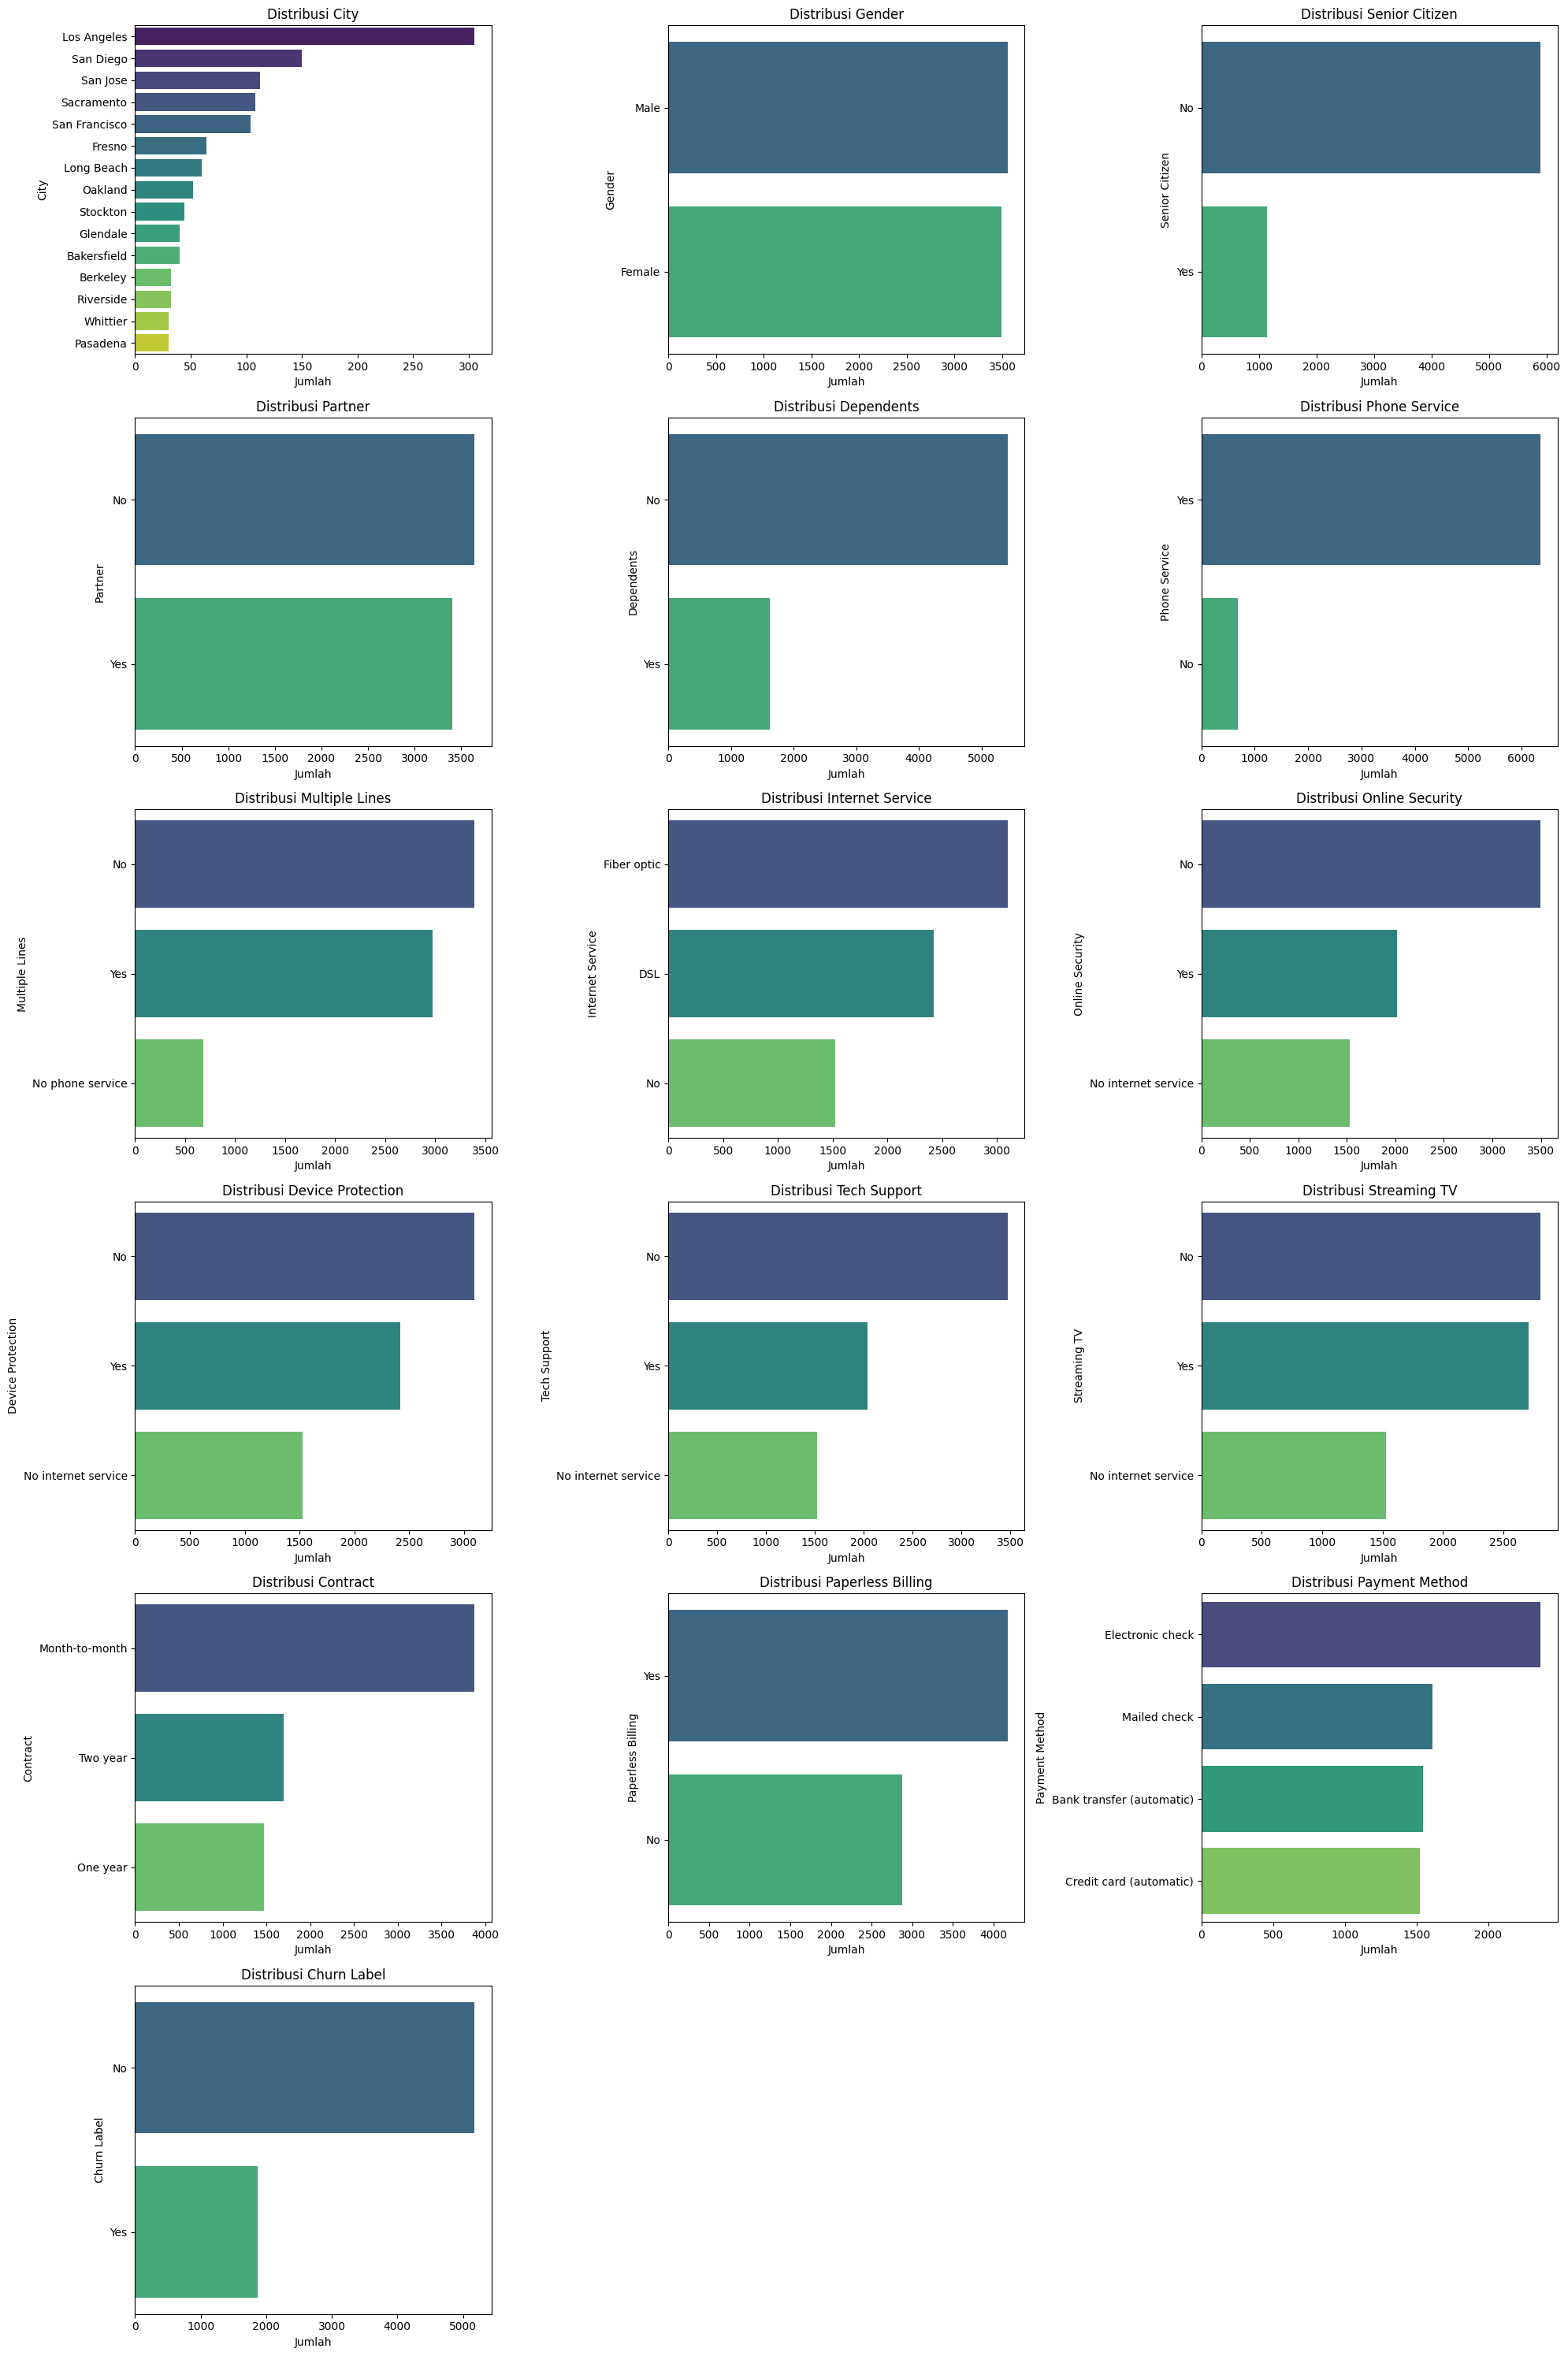

In [12]:
kategori_cols = df_final.select_dtypes(include='object').columns

# Layout: 3 grafik per baris
n_cols = 3
n_rows = (len(kategori_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))

for idx, col in enumerate(kategori_cols):
    plt.subplot(n_rows, n_cols, idx + 1)
    # Tampilkan 15 kategori teratas saja agar tidak terlalu penuh
    top_kategori = df_final[col].value_counts().nlargest(15)
    sns.barplot(y=top_kategori.index, x=top_kategori.values, hue=top_kategori.index, palette="viridis", legend=False)
    plt.title(f'Distribusi {col}')
    plt.xlabel('Jumlah')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

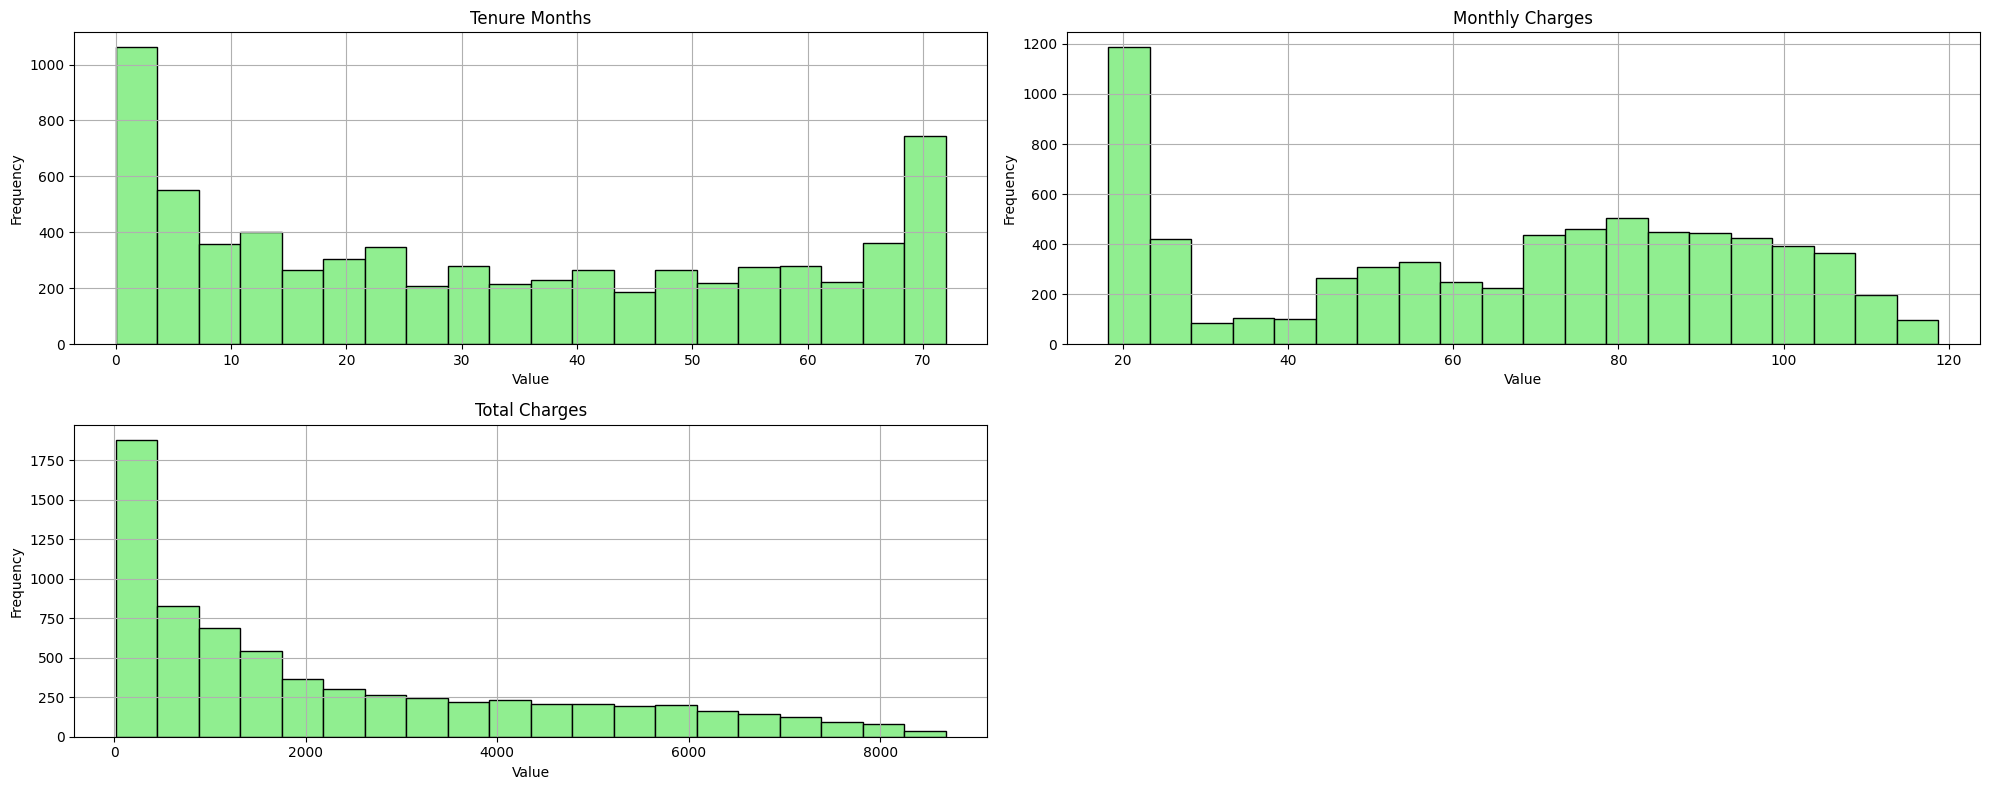

In [13]:
num_vars = df_final.select_dtypes(include='number').columns
n_cols = 2
n_rows = -(-len(num_vars) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(num_vars):
    df_final[column].hist(ax=axes[i], bins=20, edgecolor='black', color='lightgreen')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

--- Cek Outlier dengan Boxplot ---


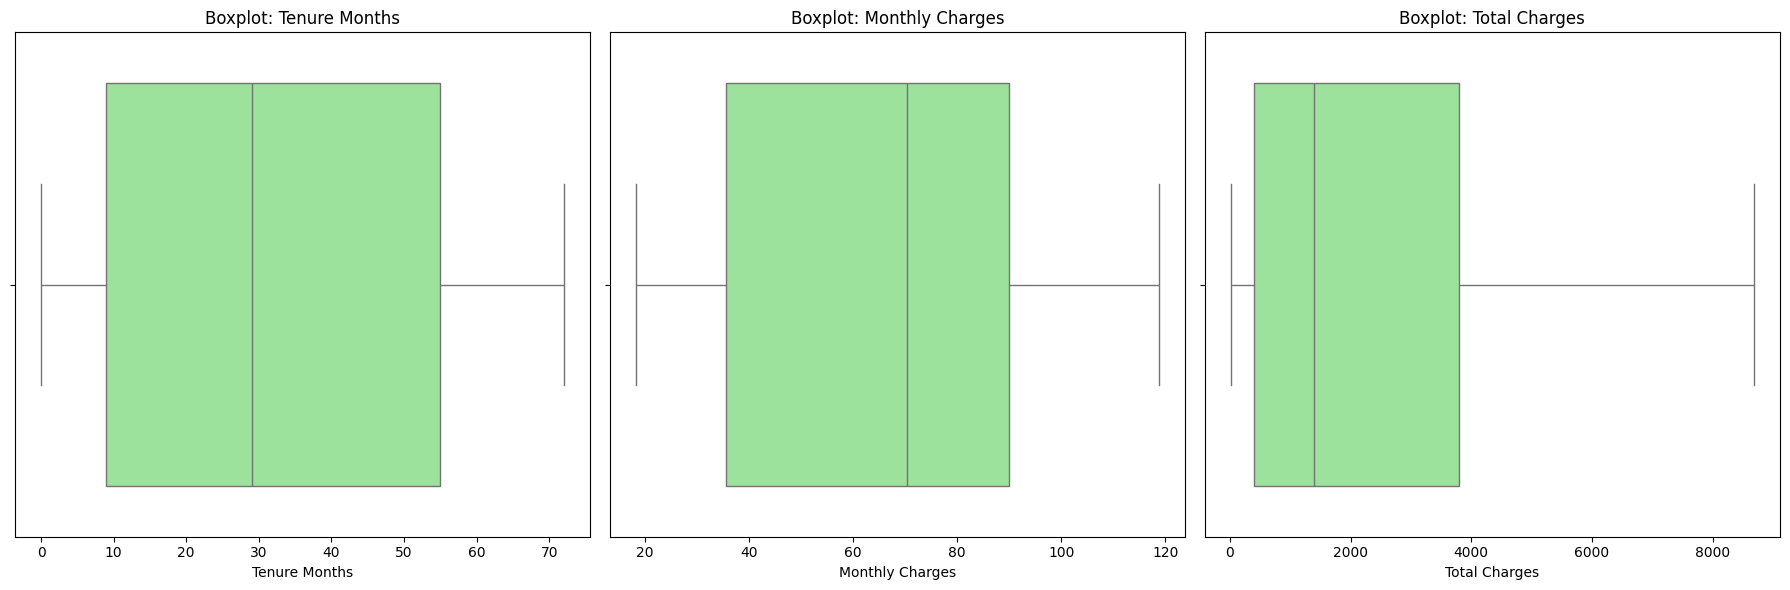

In [14]:
# Boxplot untuk Deteksi Outlier ---
print('--- Cek Outlier dengan Boxplot ---')
cols_numerik = df_final.select_dtypes(include='number').columns

cols_per_row = 3
num_cols = len(cols_numerik)

for i in range(0, num_cols, cols_per_row):
    sub_cols = cols_numerik[i:i+cols_per_row]
    fig, axes = plt.subplots(1, len(sub_cols), figsize=(18, 6))

    if len(sub_cols) == 1:
        axes = [axes]

    for j, feature in enumerate(sub_cols):
        sns.boxplot(x=df_final[feature], ax=axes[j], color='lightgreen')
        axes[j].set_title(f'Boxplot: {feature}')

    plt.tight_layout()
    plt.show()

Cek Distribusi Data


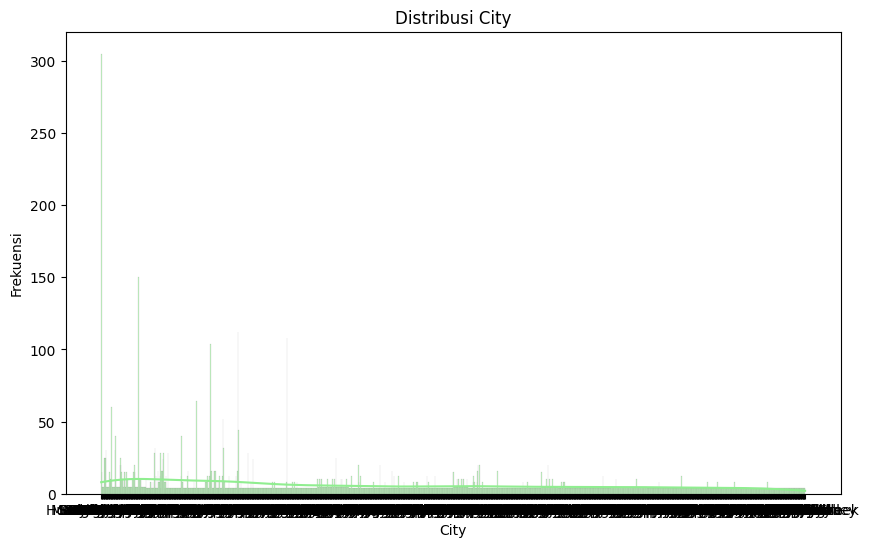

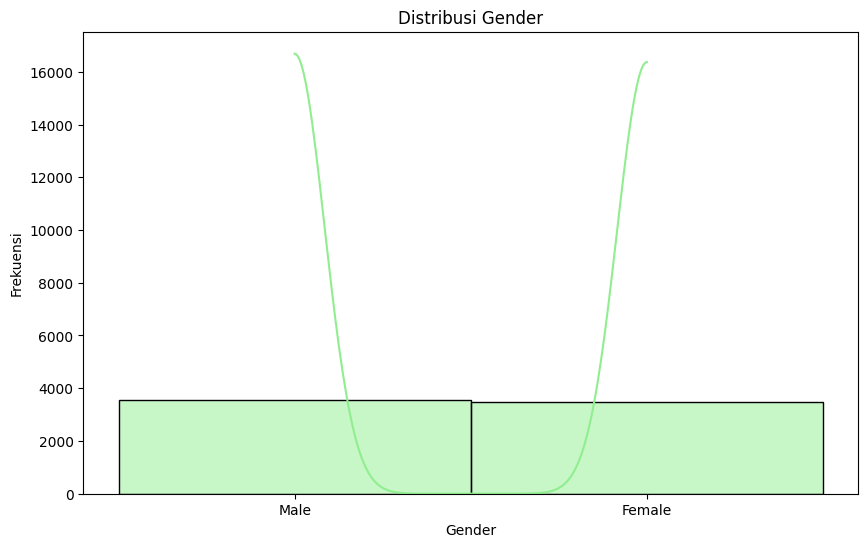

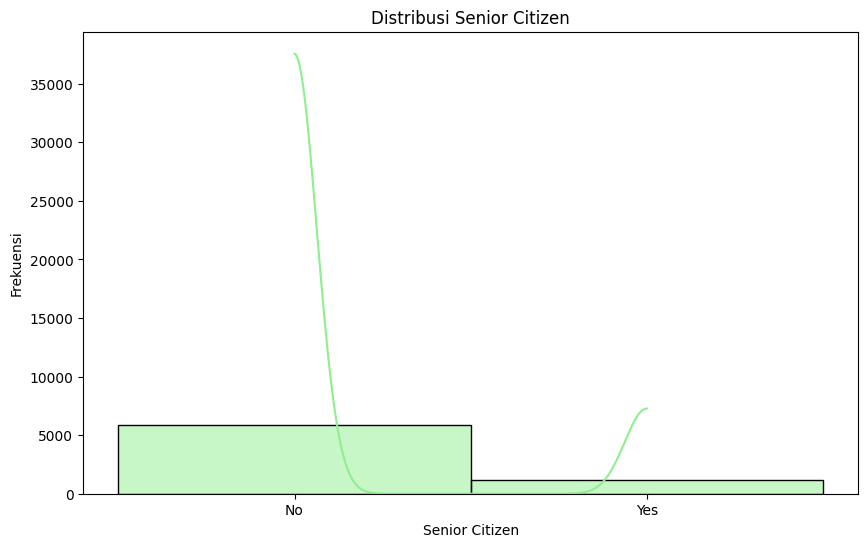

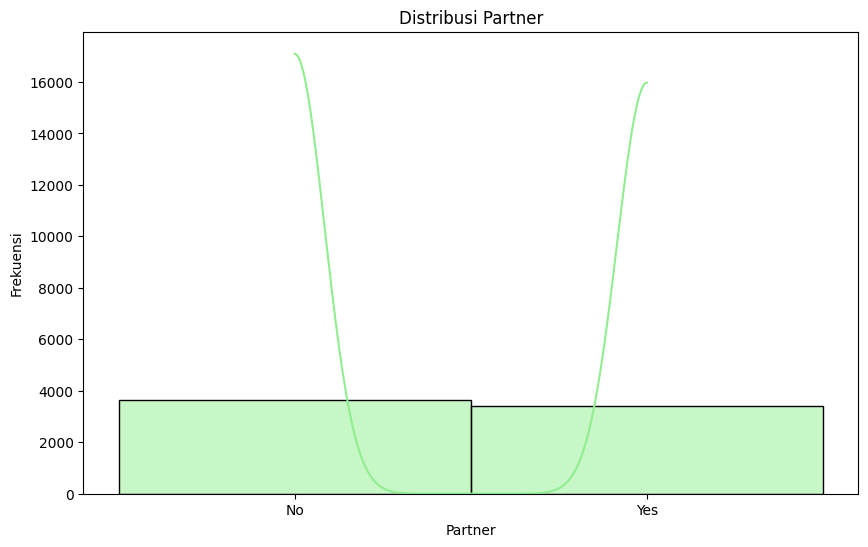

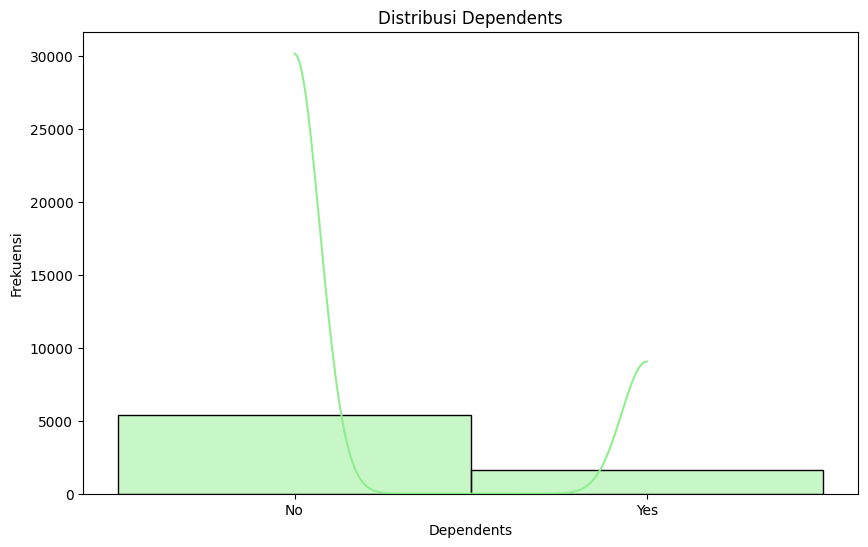

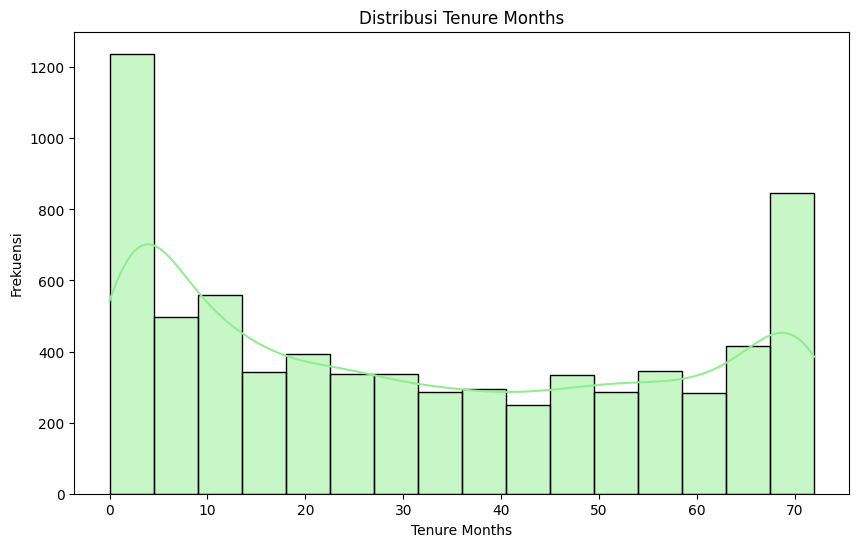

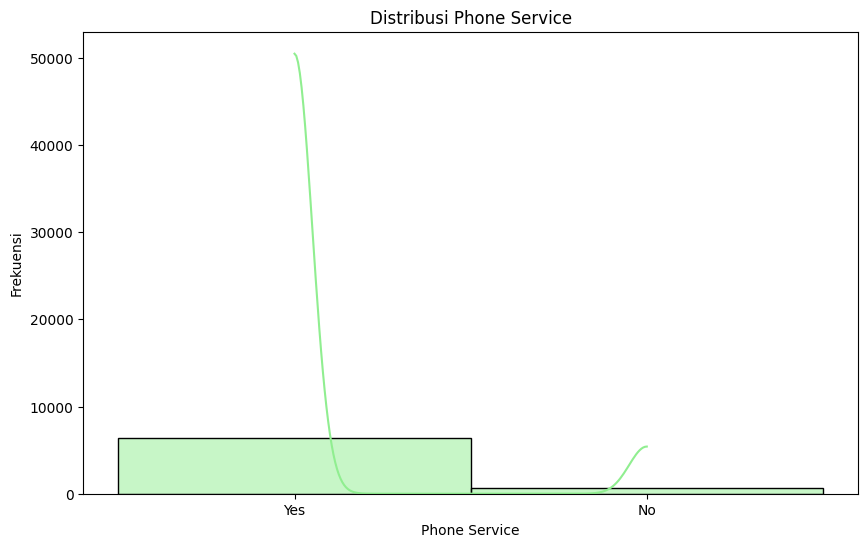

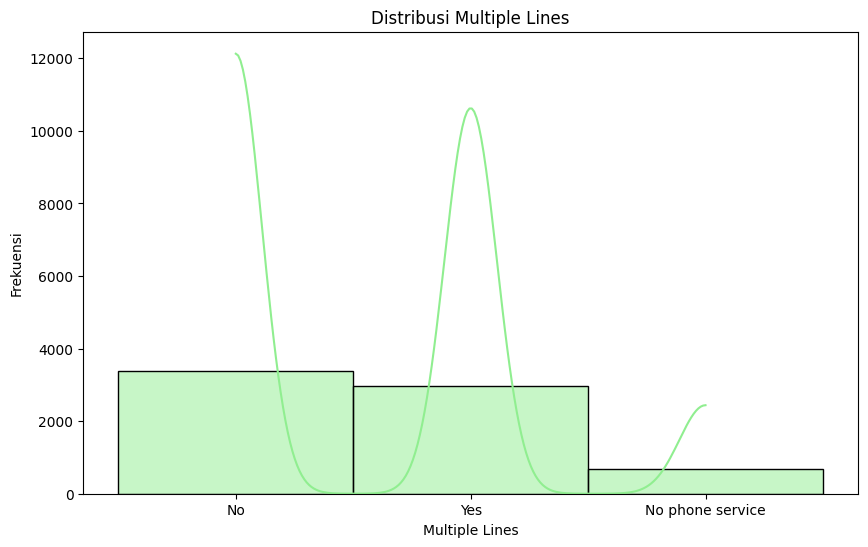

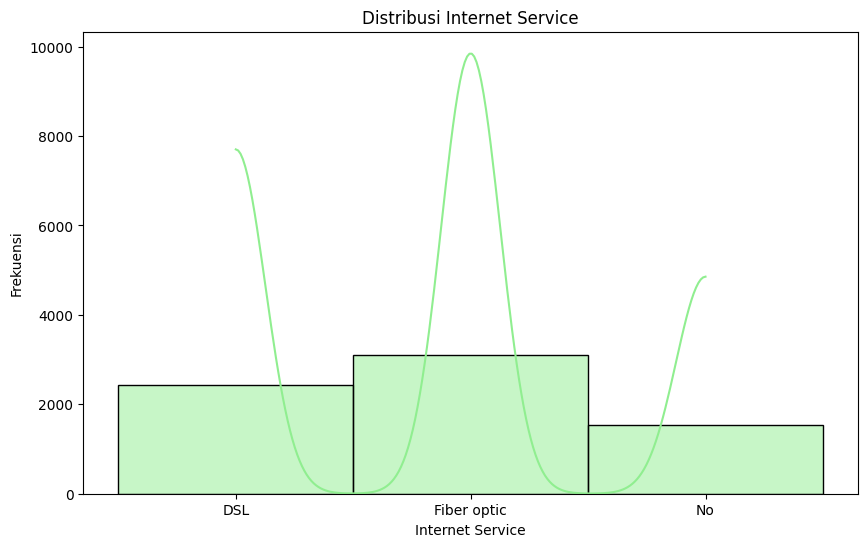

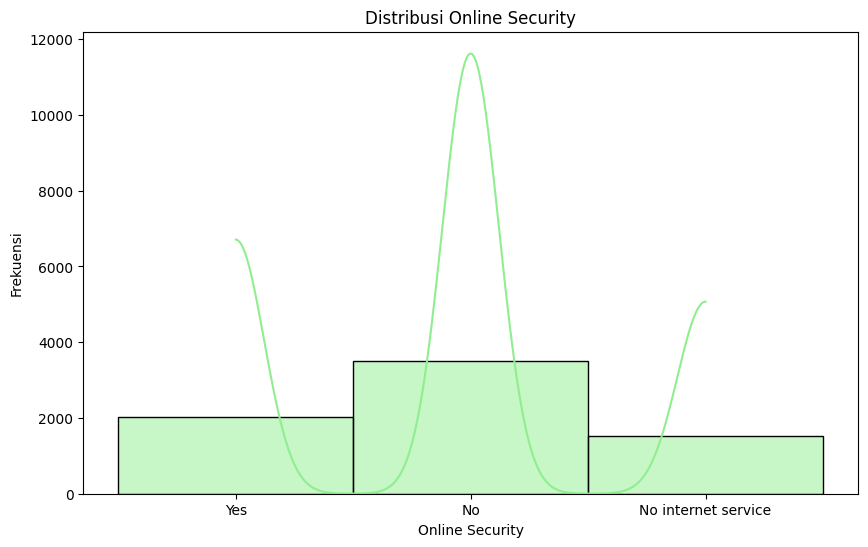

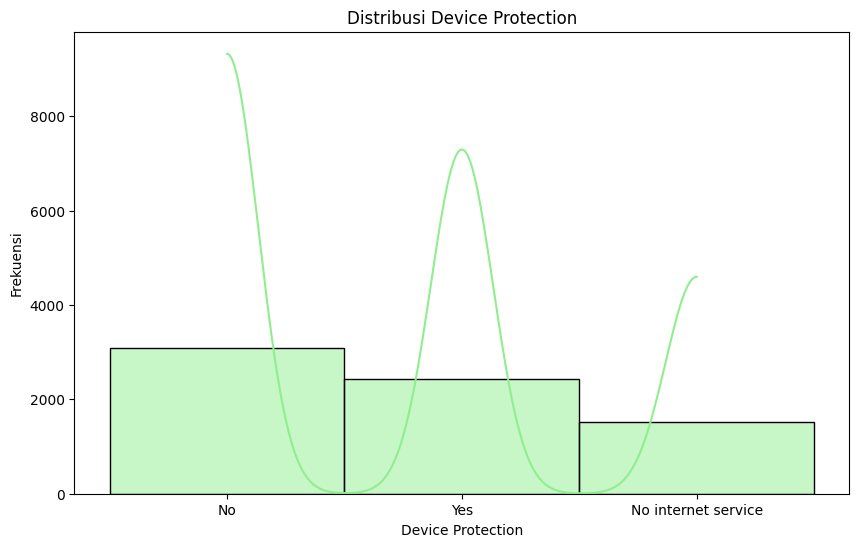

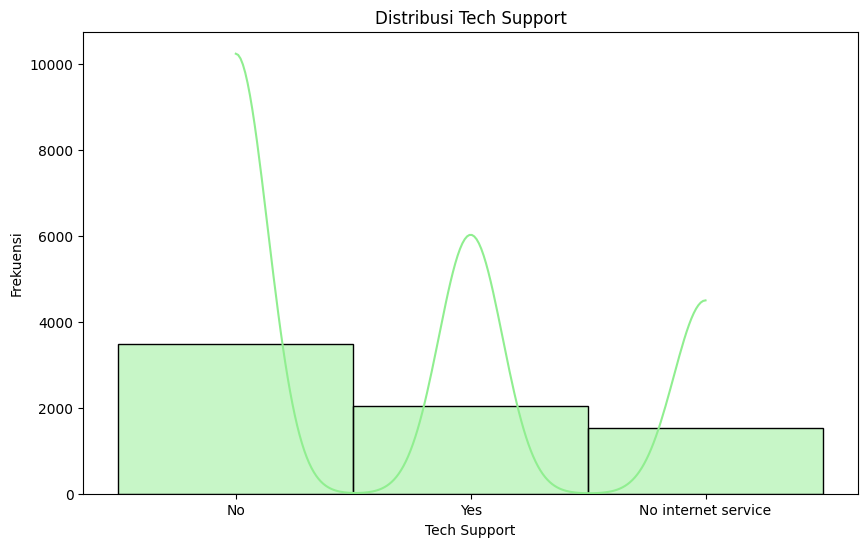

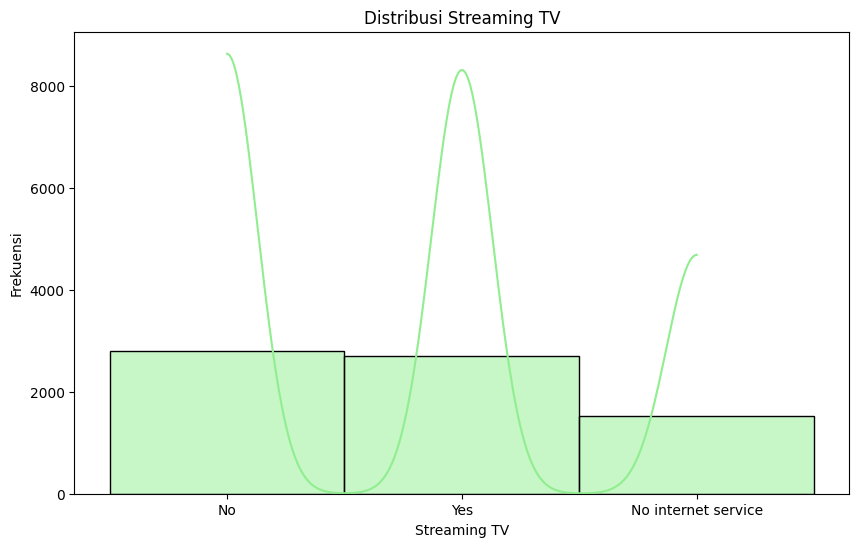

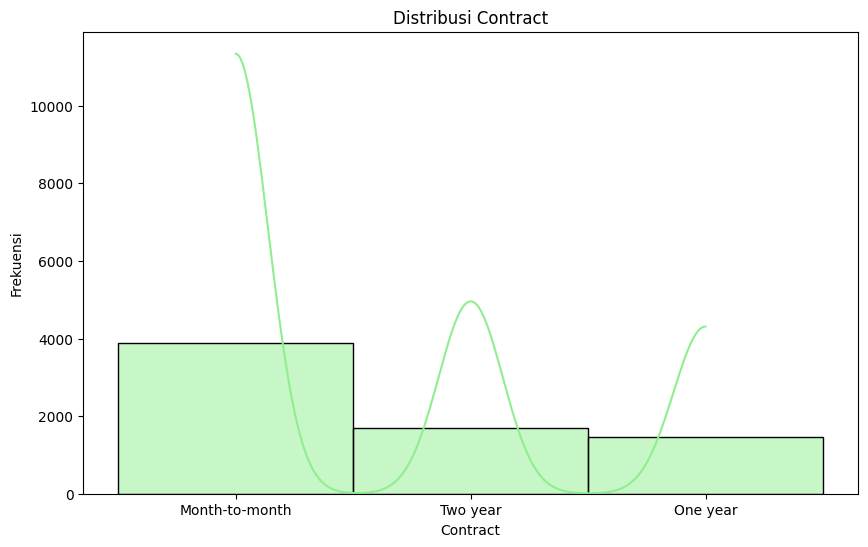

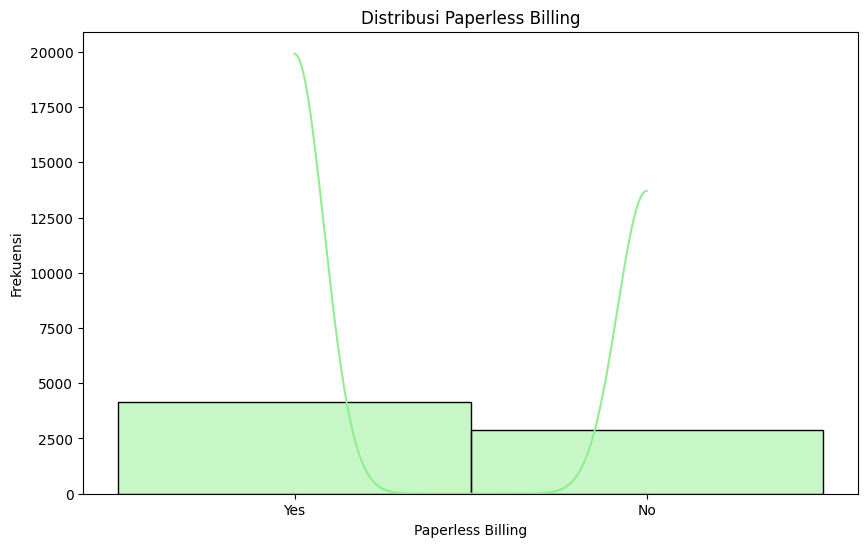

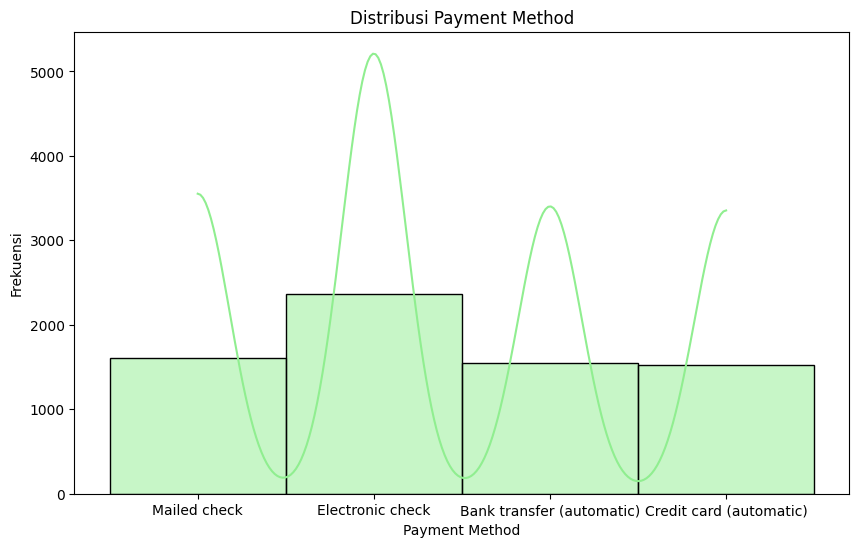

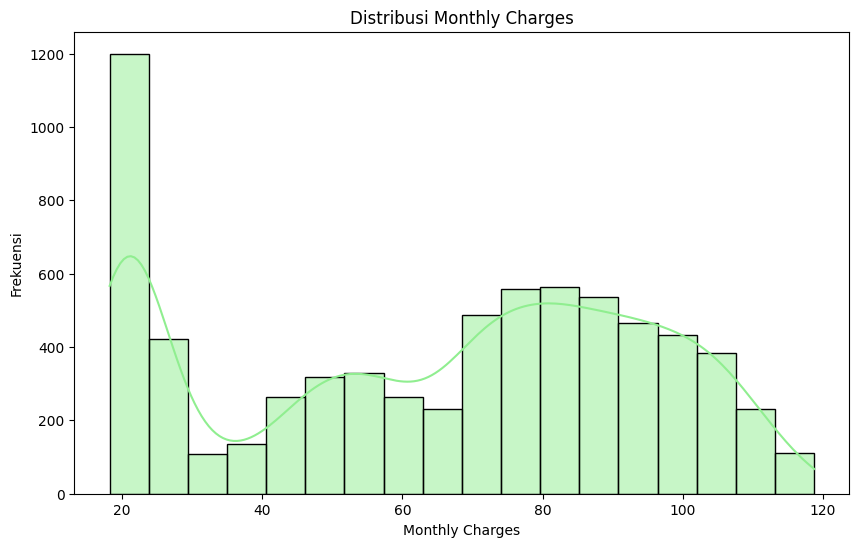

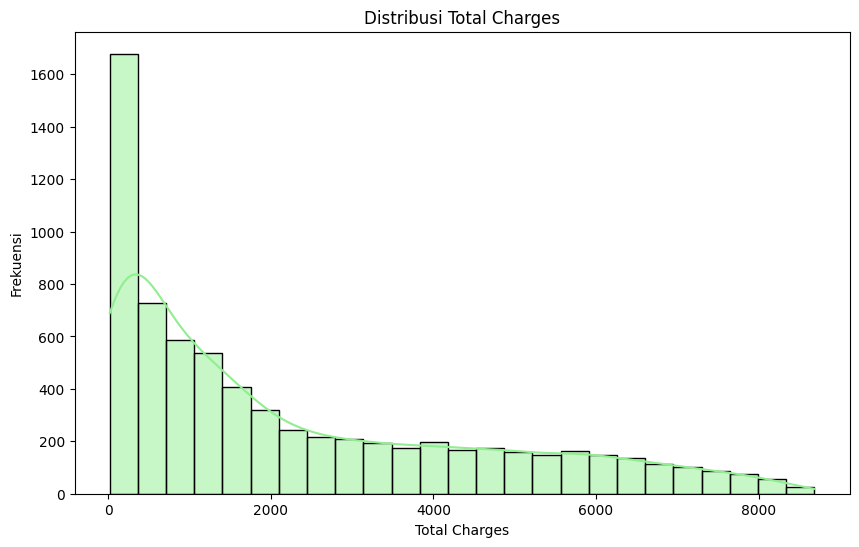

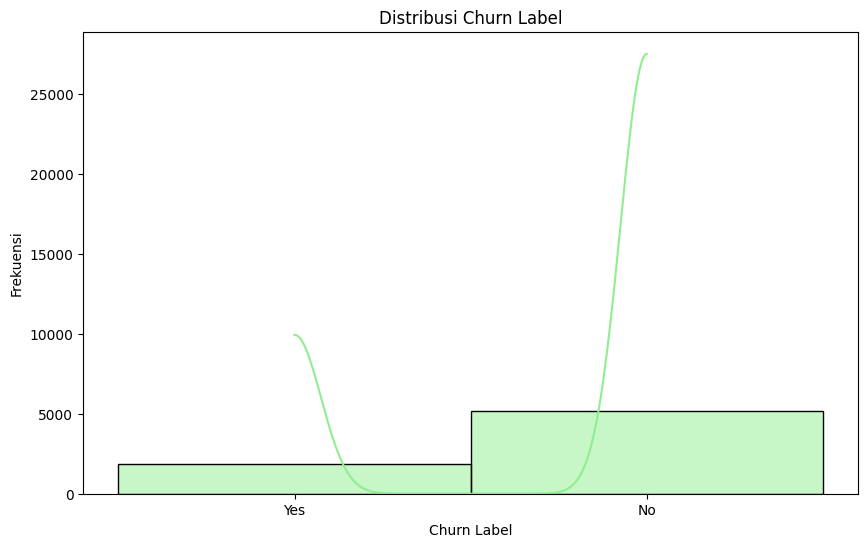

In [15]:
print('Cek Distribusi Data')

columns_to_plot = df_final.select_dtypes(include=['object', 'int64', 'float64']).columns

for feature in columns_to_plot:
    plt.figure(figsize=(10,6))
    sns.histplot(df_final[feature], color='lightgreen', kde=True)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.show()

- Mengevaluasi hubungan antar variabel.

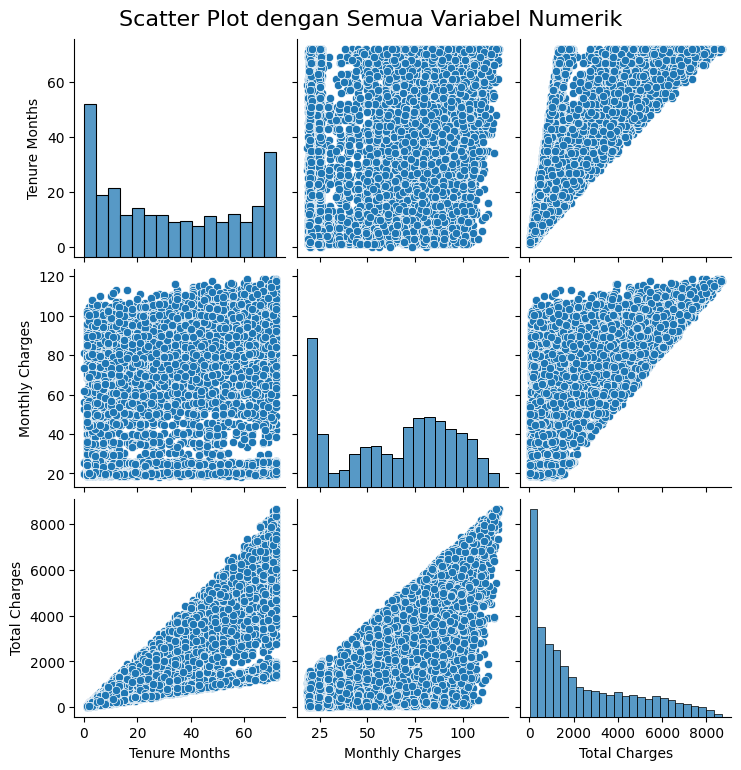

In [16]:
sns.pairplot(df_final[cols_numerik])
plt.suptitle('Scatter Plot dengan Semua Variabel Numerik', fontsize=16, y=1.02)
plt.show()

- Korelasi Antar Fitur Numerik menggunakan Heatmap

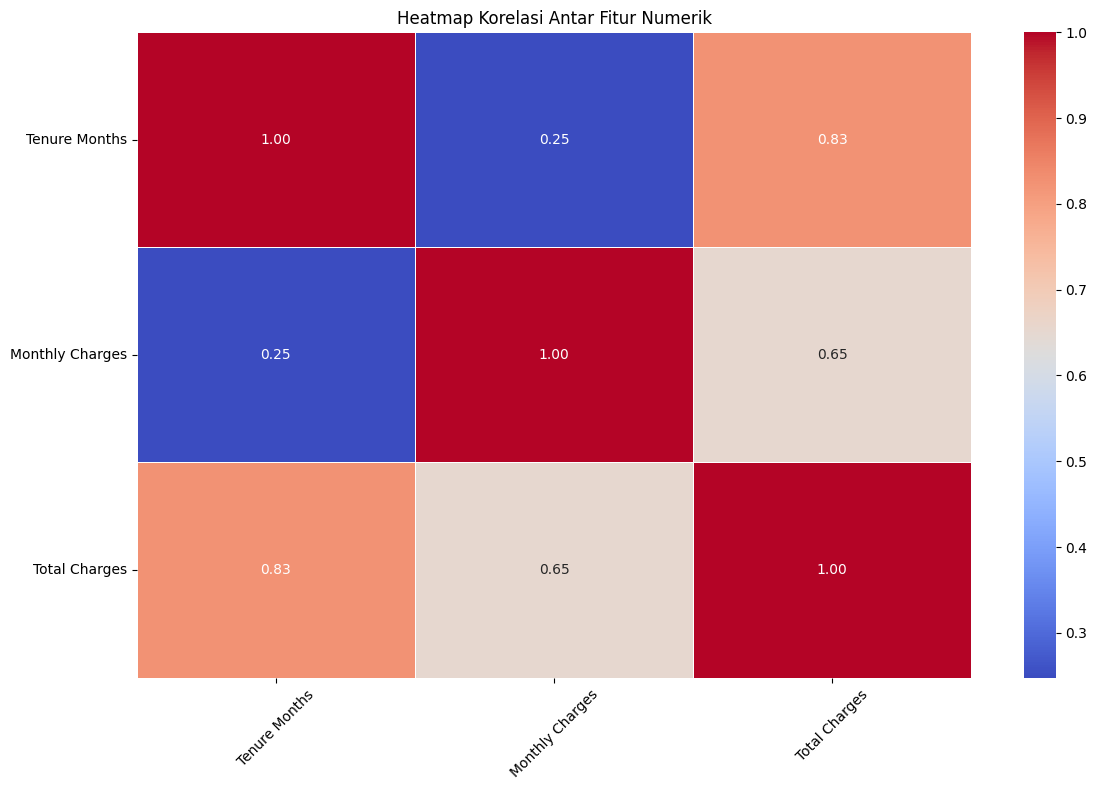

In [17]:
# Ambil hanya kolom numerik
numeric_df = df_final.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

1. Berapa banyak pelanggan yang memiliki Partner dan Contract

Tujuan: Melihat hubungan antara status pasangan (partner) dan jenis kontrak yang mereka pilih.

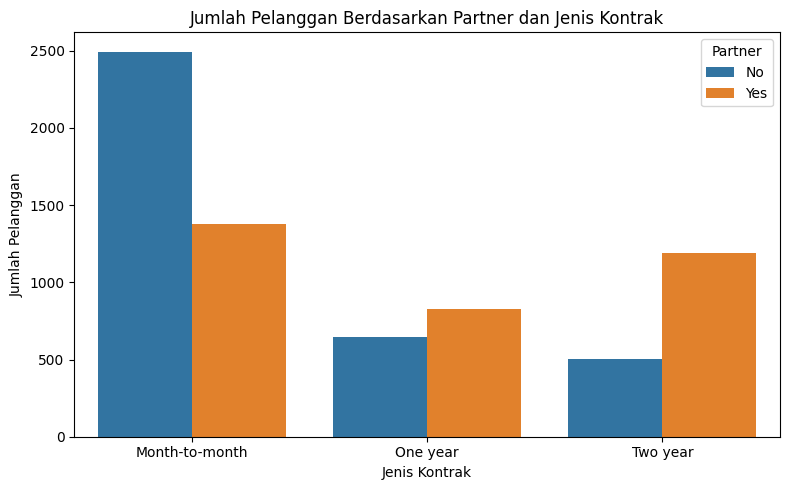

In [18]:
# Hitung jumlah pelanggan berdasarkan Partner dan Contract
partner_contract_counts = df_final.groupby(['Partner', 'Contract']).size().reset_index(name='Jumlah')

# Visualisasi dengan barplot
plt.figure(figsize=(8,5))
sns.barplot(data=partner_contract_counts, x='Contract', y='Jumlah', hue='Partner')
plt.title('Jumlah Pelanggan Berdasarkan Partner dan Jenis Kontrak')
plt.xlabel('Jenis Kontrak')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

2. Persentase PaymentMethod dalam bentuk Pie Chart

Tujuan: Mengetahui metode pembayaran paling populer di antara pelanggan.

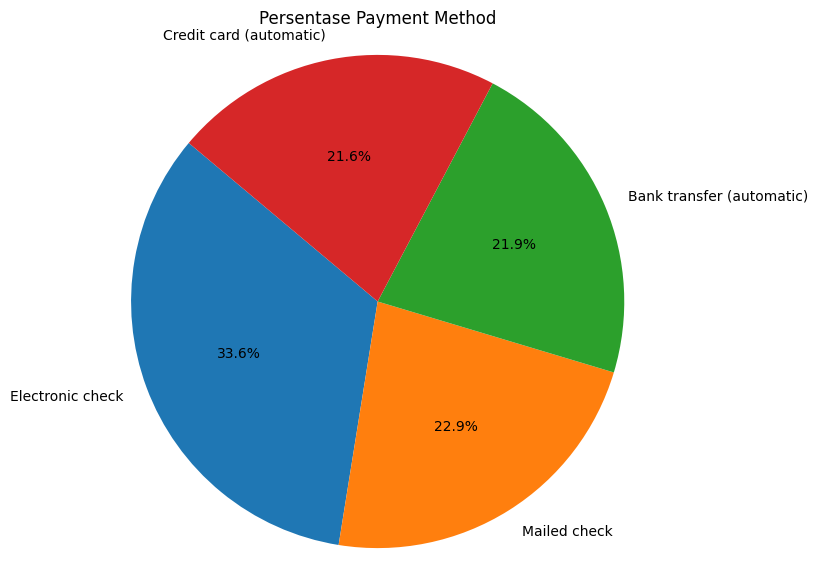

In [19]:
# Hitung persentase metode pembayaran
payment_counts = df_final['Payment Method'].value_counts()
payment_percent = payment_counts / payment_counts.sum() * 100

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(payment_percent, labels=payment_percent.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Payment Method')
plt.axis('equal')
plt.show()

3. Hubungan antara Gender dan PaperlessBilling

Tujuan: Apakah ada perbedaan antara laki-laki dan perempuan dalam memilih tagihan digital.

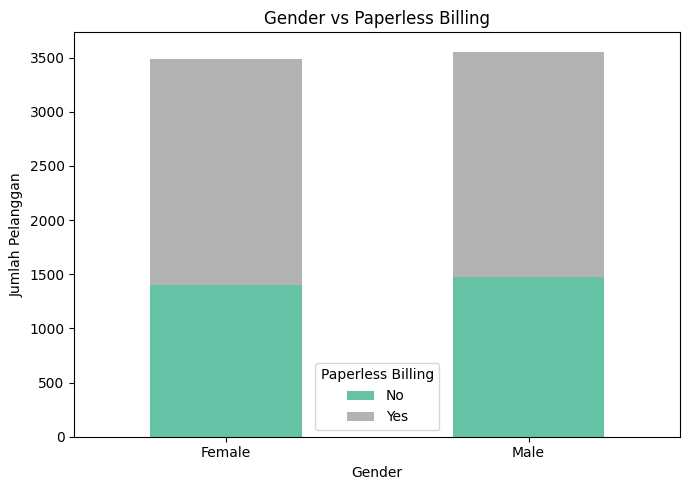

In [20]:
# Crosstab untuk gender vs paperless billing
gender_paper = pd.crosstab(df_final['Gender'], df_final['Paperless Billing'])

# Visualisasi
gender_paper.plot(kind='bar', stacked=True, figsize=(7,5), colormap='Set2')
plt.title('Gender vs Paperless Billing')
plt.xlabel('Gender')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=0)
plt.legend(title='Paperless Billing')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [21]:
df_clean = df_final.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure Months      7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Contract           7043 non-null   object 
 14  Paperless Billing  7043 non-null   object 
 15  Payment Method     7043 non-null   object 
 16  Monthly Charges    7043 

1. Menghapus atau Menangani Data Kosong (Missing Values)

In [22]:
df_clean = df_clean.dropna(subset=['Total Charges'])

In [23]:
print("Jumlah missing value tiap kolom:\n", df_clean.isnull().sum())

Jumlah missing value tiap kolom:
 City                 0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Device Protection    0
Tech Support         0
Streaming TV         0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
dtype: int64


Penanganan missing value dilakukan dengan cara menghapus nilai NaN, Sehingga data pada dataset berkurang sebanyak 11 data yang hilang.

2. Menghapus Data Duplikat

Setelah melakukan pengecekkan, dataset tidak memiliki data duplikat.

3. Normalisasi atau Standarisasi Fitur

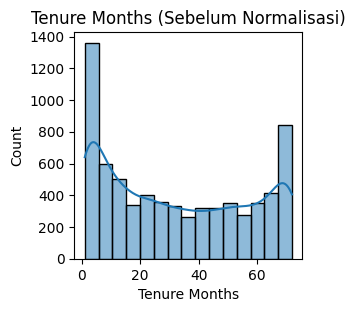

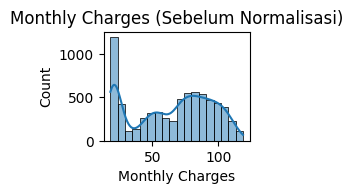

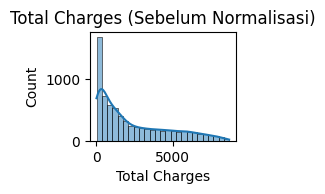

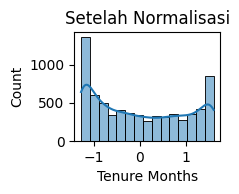

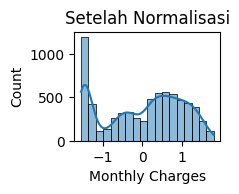

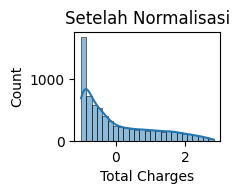

In [24]:
# Hasil Sebelum normalisasi
plt.figure(figsize=(10,10))

for i, feature in enumerate(cols_numerik, 1):
    plt.subplot(3,3, i)
    sns.histplot(df_clean[feature], kde=True)
    plt.title(f'{feature} (Sebelum Normalisasi)')
    plt.show()

df_normalized = df_clean.copy()
scaler = StandardScaler()
df_normalized[cols_numerik]=scaler.fit_transform(df_normalized[cols_numerik])

# Hasil setelah normalisasi
plt.Figure(figsize=(10,6))

for i, feature in enumerate(cols_numerik, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_normalized[feature], kde=True)
    plt.title('Setelah Normalisasi')
    plt.show()

4. Deteksi dan Penanganan Outlier

--- Cek Outlier dengan Boxplot ---


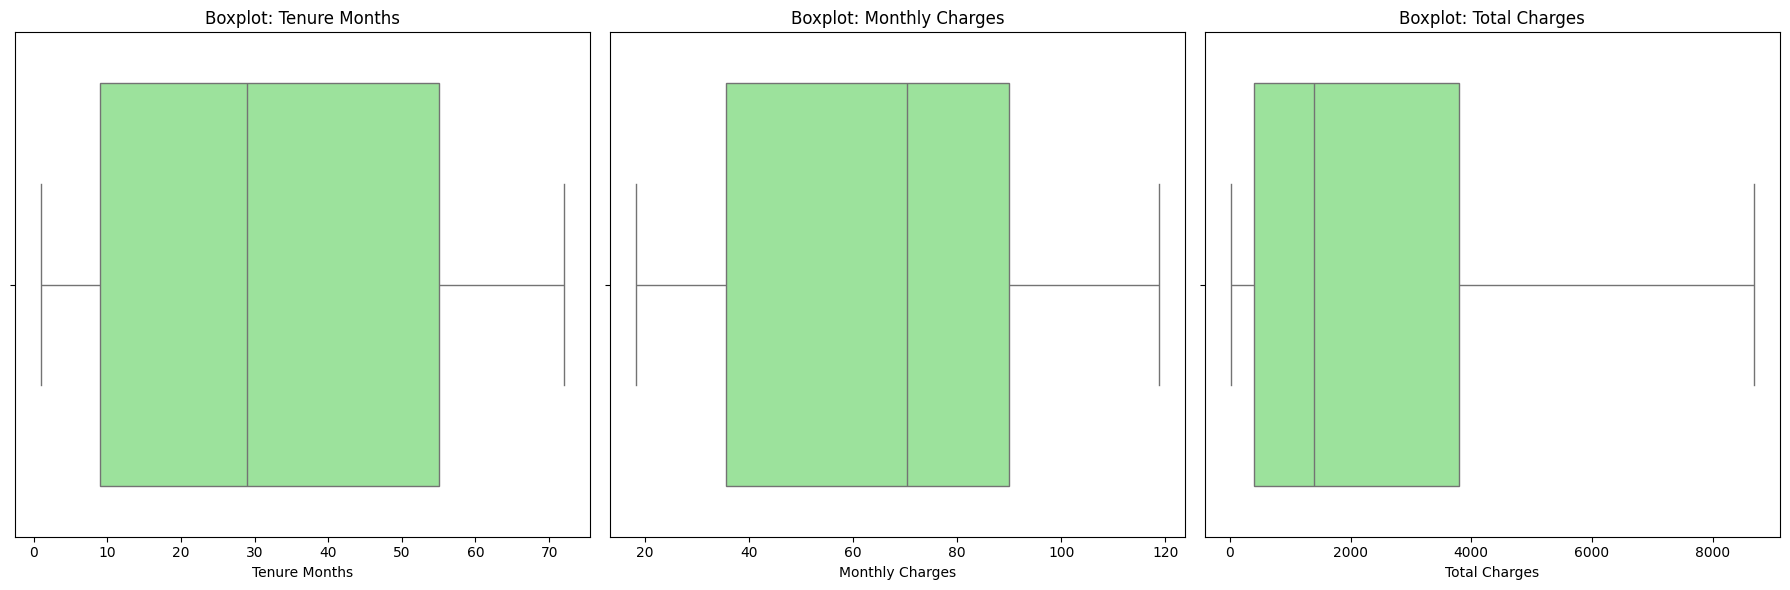

In [25]:
# Boxplot untuk Deteksi Outlier ---
print('--- Cek Outlier dengan Boxplot ---')
cols_numerik = df_clean.select_dtypes(include='number').columns

cols_per_row = 3
num_cols = len(cols_numerik)

for i in range(0, num_cols, cols_per_row):
    sub_cols = cols_numerik[i:i+cols_per_row]
    fig, axes = plt.subplots(1, len(sub_cols), figsize=(18, 6))

    if len(sub_cols) == 1:
        axes = [axes]

    for j, feature in enumerate(sub_cols):
        sns.boxplot(x=df_clean[feature], ax=axes[j], color='lightgreen')
        axes[j].set_title(f'Boxplot: {feature}')

    plt.tight_layout()
    plt.show()

Jumlah outlier yang dihapus: 0


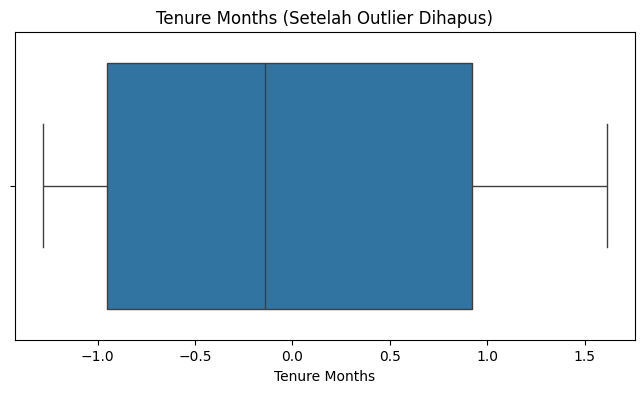

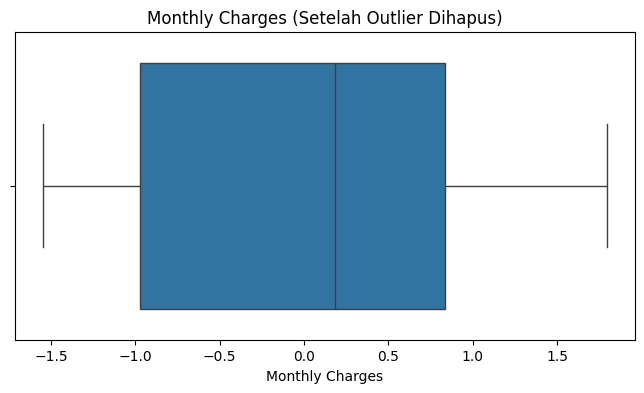

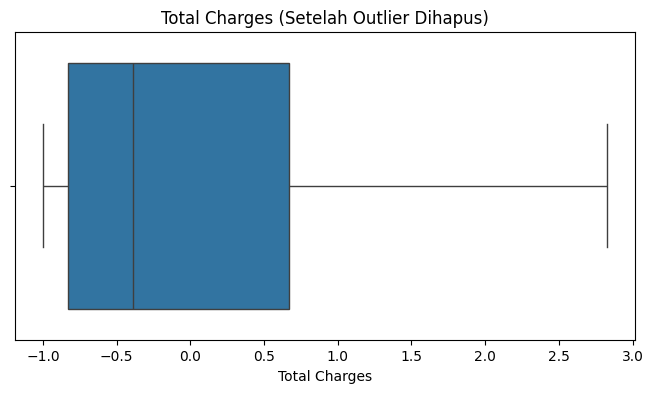

In [26]:
# Simpan jumlah data sebelum penghapusan
before = df_normalized.shape[0]

# Buat mask (topeng) untuk mendeteksi semua outlier sekaligus
mask = pd.Series(True, index=df_normalized.index)

for feature in cols_numerik:
    Q1 = df_normalized[feature].quantile(0.25)
    Q3 = df_normalized[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    feature_mask = (df_normalized[feature] >= lower_bound) & (df_normalized[feature] <= upper_bound)
    
    mask &= feature_mask  # Gabungkan kondisi

# Terapkan mask untuk menghapus outlier
df_normalized = df_normalized.loc[mask]
df_clean = df_clean.loc[mask]

# Info hasil penghapusan
after = df_normalized.shape[0]
print(f"Jumlah outlier yang dihapus: {before - after}")

# Visualisasi dengan boxplot setelah outlier dihapus
for feature in cols_numerik:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_normalized[feature])
    plt.title(f'{feature} (Setelah Outlier Dihapus)')
    plt.show()

- Dataset tidak memiliki outlier. Namun, terdapat beberapa kolom yang tidak seimbang tetapi standarisasi sudah dilakukan.

- Data tidak seimbang tidak memengaruhi distribusi secara destruktif dan model yang akan digunakan juga tidak terlalu sensitif terhadap skewness kecuali jika menggunakan model linear (Logistic Regression, SVM) harus di tangani menggunakan skewness.

5. Encoding Data Kategorikal

In [27]:
categorical_cols = df_clean.select_dtypes(include=['object']).columns

# Loop dan apply LabelEncoder ke tiap kolom kategorikal
for col in categorical_cols:
    encoder = LabelEncoder()
    df_clean[col] = encoder.fit_transform(df_clean[col].astype(str))
    
print('\n===== Label Encoding untuk Semua Kolom Kategori (tipe object) =====\n')
print(df_clean.head())


===== Label Encoding untuk Semua Kolom Kategori (tipe object) =====

   City  Gender  Senior Citizen  Partner  Dependents  Tenure Months  \
0   562       1               0        0           0              2   
1   562       0               0        0           1              2   
2   562       0               0        0           1              8   
3   562       0               0        1           1             28   
4   562       1               0        0           1             49   

   Phone Service  Multiple Lines  Internet Service  Online Security  \
0              1               0                 0                2   
1              1               0                 1                0   
2              1               2                 1                0   
3              1               2                 1                0   
4              1               2                 1                0   

   Device Protection  Tech Support  Streaming TV  Contract  Paperless Billin

5. Splitting data

In [28]:
target_column = 'Churn Label'

# Pisahkan fitur dan target
X = df_clean.drop(target_column, axis=1)
y = df_clean[target_column]

# Split data menjadi train dan test (80:20), stratify untuk menjaga proporsi target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Cek hasil
print("Ukuran Data:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print("\nDistribusi Label y_train:")
print(y_train.value_counts(normalize=True).mul(100).round(2))

Ukuran Data:
X_train: (5625, 18), X_test: (1407, 18)

Distribusi Label y_train:
Churn Label
0    73.42
1    26.58
Name: proportion, dtype: float64


0 = No, Maka terdapat 73% data tidak churn
1 = Yes, terdapat 26% data churn

6. SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE ke data training
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Cek distribusi baru setelah SMOTE
print("Distribusi Label y_train setelah SMOTE (%):")
print(y_train_resampled.value_counts(normalize=True).mul(100).round(2))

Distribusi Label y_train setelah SMOTE (%):
Churn Label
0    50.0
1    50.0
Name: proportion, dtype: float64


7. Save Dataset Akhir

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7032 non-null   int64  
 1   Gender             7032 non-null   int64  
 2   Senior Citizen     7032 non-null   int64  
 3   Partner            7032 non-null   int64  
 4   Dependents         7032 non-null   int64  
 5   Tenure Months      7032 non-null   int64  
 6   Phone Service      7032 non-null   int64  
 7   Multiple Lines     7032 non-null   int64  
 8   Internet Service   7032 non-null   int64  
 9   Online Security    7032 non-null   int64  
 10  Device Protection  7032 non-null   int64  
 11  Tech Support       7032 non-null   int64  
 12  Streaming TV       7032 non-null   int64  
 13  Contract           7032 non-null   int64  
 14  Paperless Billing  7032 non-null   int64  
 15  Payment Method     7032 non-null   int64  
 16  Monthly Charges    7032 non-n

In [31]:
df_clean['Churn Label'].value_counts()

Churn Label
0    5163
1    1869
Name: count, dtype: int64

In [32]:
df_clean.to_csv('../Dataset/data_bersih_preprocessing.csv', index=False)